### Good first cell for image processing

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import os
import itertools
from collections import namedtuple

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

#paths.print_paths()

### Python 3 glob using Path module

In [2]:
from pathlib import Path

sample_image_path = '/path/to/root/folder'
img_path_list = [img_path for img_path in Path(sample_image_path).glob('**/*.png')]


### Plot single images

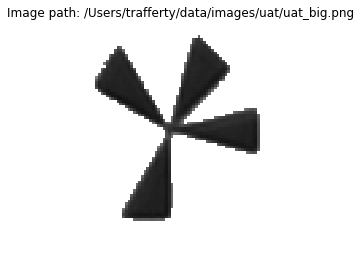

In [3]:
fname = f'{paths.images_root}/uat/uat_big.png'

img = cv2.imread(f'{paths.images_root}/uat/uat_big.png')
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Image path: {fname}')
plt.axis('off')
plt.show()


### Plot multiple images


In [4]:
img_path_lst = [
 f'{paths.images_root}/uat/uat_23x25.png',
 f'{paths.images_root}/uat/uat_24x24.png',
 f'{paths.images_root}/uat/uat_26x28.png',
 f'{paths.images_root}/uat/uat_38x40.png',
 f'{paths.images_root}/uat/UAT_array_01.png',
 f'{paths.images_root}/uat/UAT_array_02.png',
 f'{paths.images_root}/uat/uat_big.png']

img_lst = [cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE) for img_path in img_path_lst ]

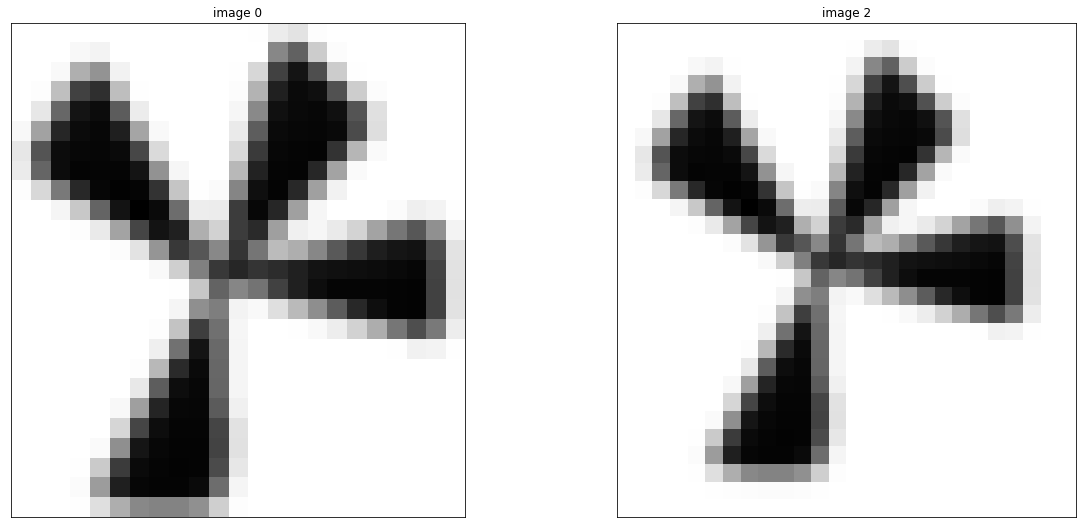

In [5]:
# using my util module:
util.plot_imgs([(img_lst[0],'image 0'), (img_lst[2],'image 2')], max_cols = 3)

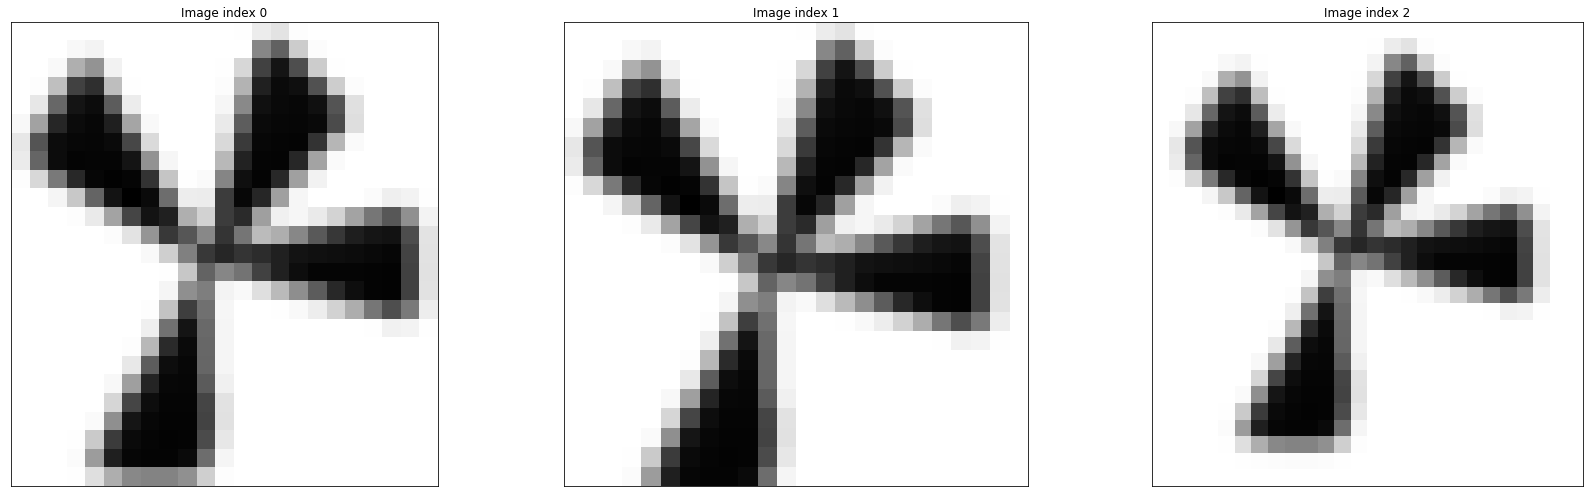

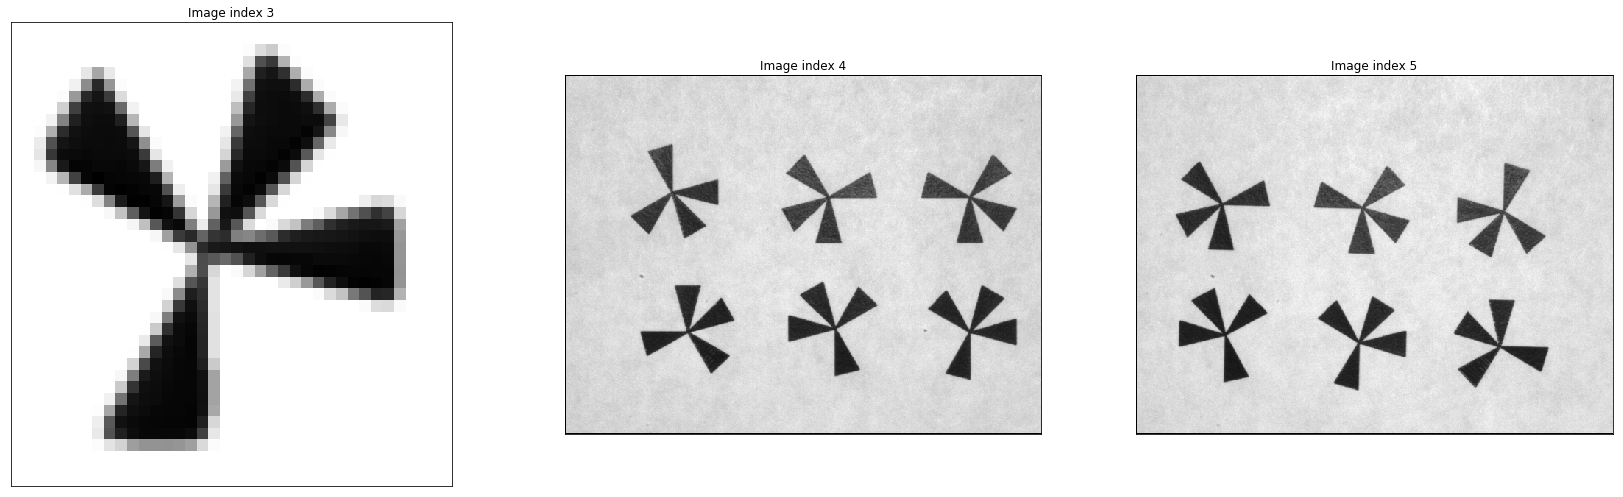

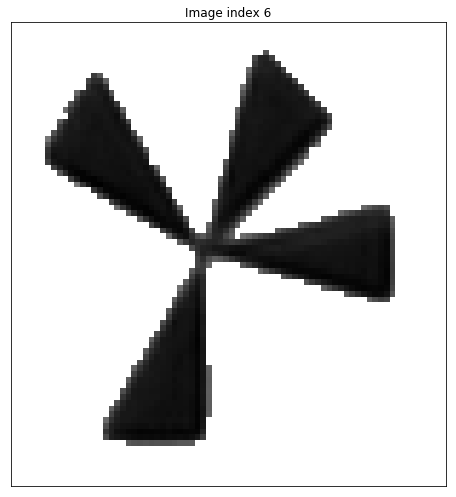

In [6]:
plt_lst = [ (img, f"Image index {i}") for i, img in enumerate(img_lst)]
util.plot_imgs(plt_lst, max_cols = 3)

In [7]:
# create list containing paths to images.  NOTE: paths should be relative, and cannot go higher than working dir (unless i am wrong)
img_path_lst2 = ['../'+'/'.join(img_path.split('/')[-2:]) for img_path in img_path_lst]

# create HTML str from list of snippets built from image path list above
imageMontage_html=''.join( ["<img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='%s' />" % str(s) for s in sorted(img_path_lst2) ])
display(HTML(imageMontage_html))
print(imageMontage_html)

<img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/UAT_array_01.png' /><img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/UAT_array_02.png' /><img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/uat_23x25.png' /><img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/uat_24x24.png' /><img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/uat_26x28.png' /><img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/uat_38x40.png' /><img style='width: 200px; margin: 1px; float: left; border: 2px solid black;' src='../uat/uat_big.png' />


In [8]:
# Use HTML to plot full folder 
from pathlib import Path

sample_image_path = '../images'
img_path_list = [img_path for img_path in Path(sample_image_path).glob('**/*.png')]

imagesList=''.join( ["<img style='width: 120px; margin: 10px; float: left; border: 2px solid black;' src='%s' />" % str(s) 
                 for s in sorted(img_path_list) ])
display(HTML(imagesList))


### Plot multiple images as montage using imutils

In [9]:
# Note: upgrade imutils from time-to-time:  pip install --upgrade imutils

from imutils import build_montages
from imutils import paths

In [ ]:
def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

Created 1 montages


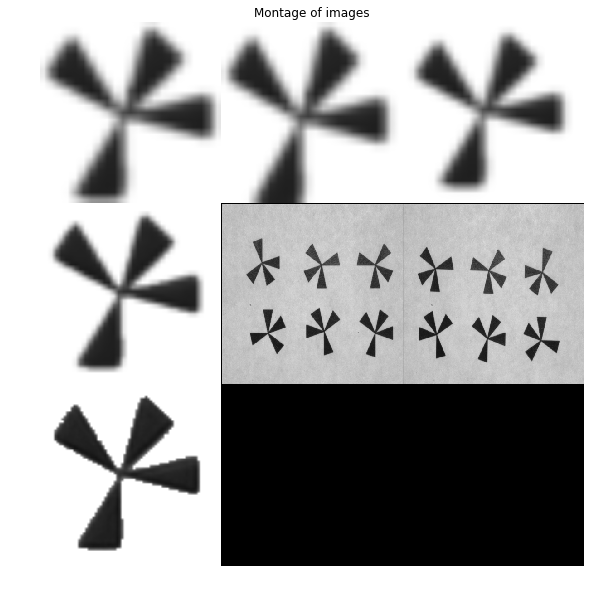

In [18]:
img_color_lst = []
for img in img_lst:
    img_color_lst.append(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    
img_cnt = len(img_color_lst)
montages = build_montages(img_color_lst, (400, 400), (int(img_cnt/2), 3))

print(f"Created {len(montages)} montages")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(montages[0], cmap=plt.cm.gray_r, interpolation='none')
ax.set_title(f'Montage of images')
ax.axis('off')
plt.show()



### Interactive Image view using pywidget 'interact'

In [45]:
from ipywidgets import interact

In [46]:
def browse_images(img_lst):
    n = len(img_lst)
    def view_image(i):
        plt.imshow(img_lst[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Image #: %d' % i)
        plt.show()
    interact(view_image, i=(0,n-1))


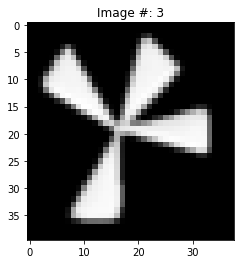

In [47]:
browse_images(img_lst)